<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Melvin's Miniproject 2

## 1.EDA

In [39]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This wine data has 3 classes on the target column, 0, 1 and 2 
wine = datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df["Progression"] = wine.target

wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Progression
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [40]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Progression
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [41]:
wine_df.shape

(178, 14)

In [42]:
# For the purpose of learning, I will intentionally create missing values from the data set. As we can see here, there is none
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Progression                     0
dtype: int64

In [43]:
num_missing_values = 100

for _ in range(num_missing_values):
    # Choose a random column
    random_column = np.random.choice(wine_df.columns)
    
    # Choose a random row
    random_row = np.random.randint(0, len(wine_df))
    
    # Replace the value with a null value (e.g., np.nan)
    wine_df.at[random_row, random_column] = np.nan
    
wine_df.isnull().sum()

alcohol                          8
malic_acid                       7
ash                              4
alcalinity_of_ash                6
magnesium                        6
total_phenols                    5
flavanoids                      14
nonflavanoid_phenols             8
proanthocyanins                  5
color_intensity                  5
hue                              8
od280/od315_of_diluted_wines     5
proline                          7
Progression                      9
dtype: int64

In [44]:
# Finding out what is the percentage of missing value from each column
missing_percentage = (wine_df.isnull().sum() / len(wine_df)) * 100
missing_percentage

alcohol                         4.494382
malic_acid                      3.932584
ash                             2.247191
alcalinity_of_ash               3.370787
magnesium                       3.370787
total_phenols                   2.808989
flavanoids                      7.865169
nonflavanoid_phenols            4.494382
proanthocyanins                 2.808989
color_intensity                 2.808989
hue                             4.494382
od280/od315_of_diluted_wines    2.808989
proline                         3.932584
Progression                     5.056180
dtype: float64

In [45]:
# If there is more than 20% missing value in a column, I will drop the whole column
# If it's between 5-10% I will delete the row
# If it's less than 5% I will fill it with a np.mean()

drop_column_threshold = 20
delete_row_threshold_low = 5
delete_row_threshold_high = 10

# Identify columns with more than 20% missing values and drop them
columns_to_drop = missing_percentage[missing_percentage > drop_column_threshold].index
wine_df.drop(columns=columns_to_drop, inplace=True)

# Identify columns with missing values between 5-10% and drop rows with missing values
for column in wine_df.columns:
    if missing_percentage[column] >= delete_row_threshold_low and missing_percentage[column] <= delete_row_threshold_high:
        wine_df.dropna(subset=[column], inplace=True)
        
# Fill columns with missing values less than 5% with their respective means
for column in wine_df.columns:
    if missing_percentage[column] < delete_row_threshold_low:
        wine_df[column].fillna(wine_df[column].mean(), inplace=True)
        
# Reset the index if needed
wine_df.reset_index(drop=True, inplace=True)

In [51]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Progression                     0
dtype: int64

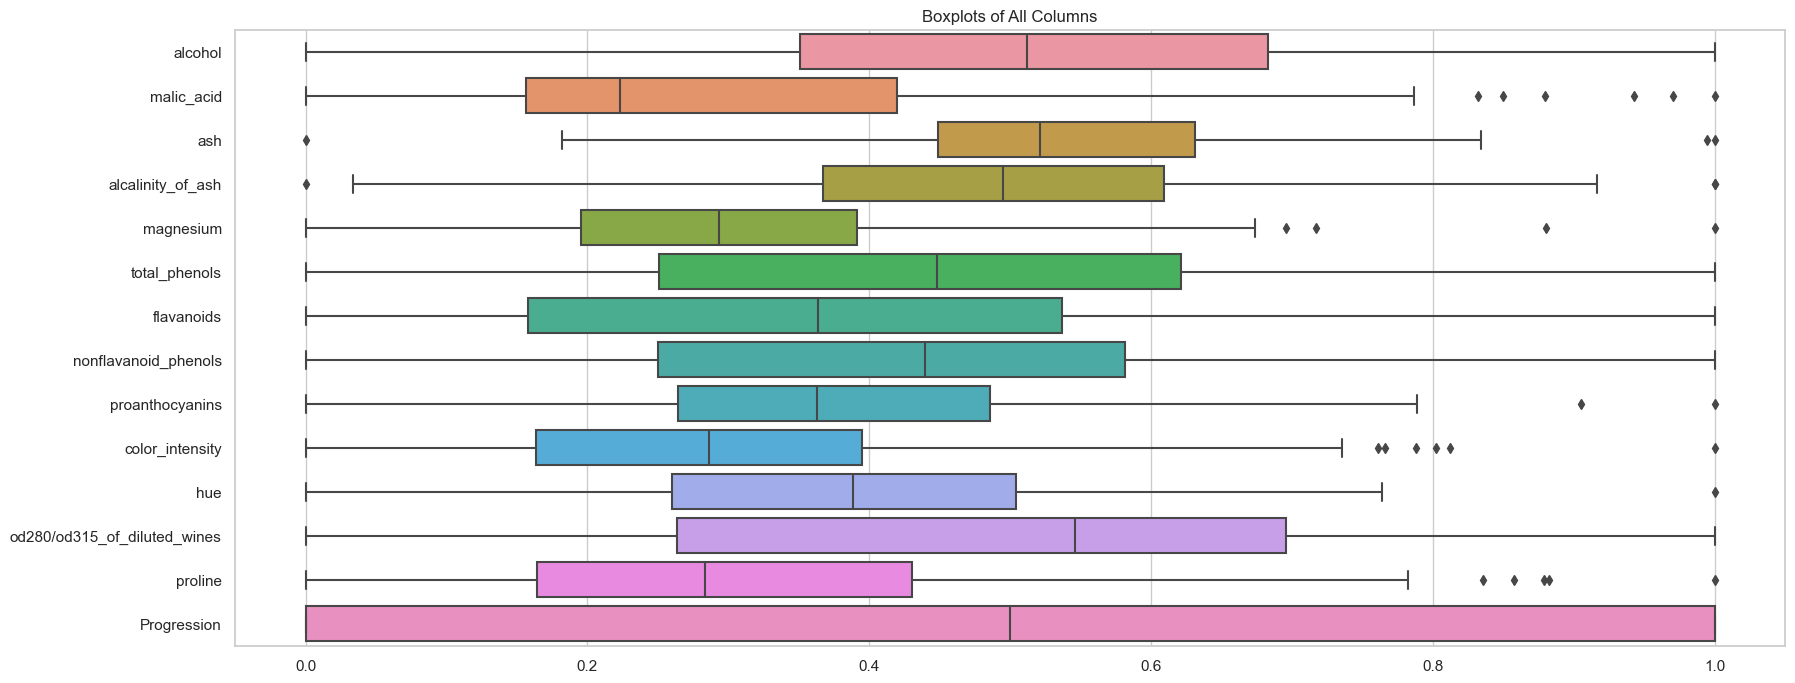

In [127]:
# Now moving on to finding out outliers, starting from visualizing boxplot

# Scaling the dataframe only for boxplot for better visualization, the rest of process still use original dataframe
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
wine_df_scaled = wine_df.copy()

for column in wine_df.columns:
    wine_df_scaled[column] = scaler.fit_transform(wine_df_scaled[[column]])

# Create boxplot for each column
plt.figure(figsize=(20, 8))
sns.boxplot(data=wine_df_scaled, orient="h")
plt.title("Boxplots of All Columns")
plt.show()

In [47]:
# Visualizing it was good as it gives rough idea what the data set look like. But putting a number for this would be better

# Create an empty dictionary to store the outlier counts for each column
outlier_counts = {}
wine_df_no_outliers = wine_df.copy()

# Iterate through the columns
for col_name in wine_df.columns:
    # Calculate the IQR for the column
    Q1 = wine_df[col_name].quantile(0.25)
    Q3 = wine_df[col_name].quantile(0.75)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the values outside the bounds
    outliers = wine_df_no_outliers[(wine_df_no_outliers[col_name] < lower_bound) | (wine_df_no_outliers[col_name] > upper_bound)]

    # Count the number of outliers
    num_outliers = len(outliers)

    # Store the outlier count in the dictionary
    outlier_counts[col_name] = num_outliers
    
    # Remove the outliers from the copy of the DataFrame
    wine_df_no_outliers = wine_df_no_outliers[(wine_df_no_outliers[col_name] >= lower_bound) & (wine_df_no_outliers[col_name] <= upper_bound)]

# Print the outlier counts for each column
for col_name, num_outliers in outlier_counts.items():
    print(f"Number of outliers in '{col_name}': {num_outliers}")

Number of outliers in 'alcohol': 0
Number of outliers in 'malic_acid': 6
Number of outliers in 'ash': 3
Number of outliers in 'alcalinity_of_ash': 1
Number of outliers in 'magnesium': 4
Number of outliers in 'total_phenols': 0
Number of outliers in 'flavanoids': 0
Number of outliers in 'nonflavanoid_phenols': 0
Number of outliers in 'proanthocyanins': 1
Number of outliers in 'color_intensity': 6
Number of outliers in 'hue': 1
Number of outliers in 'od280/od315_of_diluted_wines': 0
Number of outliers in 'proline': 5
Number of outliers in 'Progression': 0


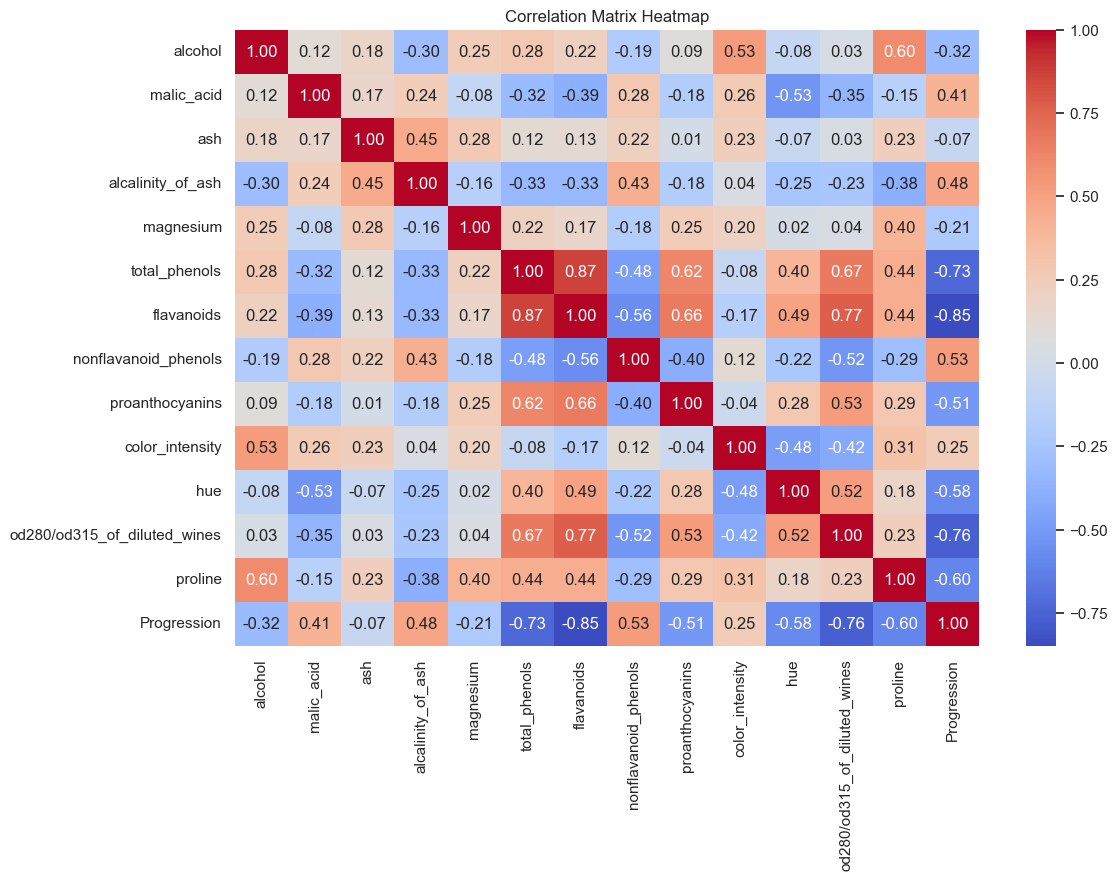

In [48]:
# A little more visualization with the heatmap
# Calculate the correlation matrix
correlation_matrix = wine_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## 2.Divide Dataset into Train/Test Sets

In [66]:
from sklearn.model_selection import train_test_split

X = wine_df_no_outliers.drop('Progression', axis=1)
y = wine_df_no_outliers['Progression']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8)

## 3.Training

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

LR = LogisticRegression(max_iter=3000)
Gauss = GaussianNB()
SVC = svm.SVC(kernel = 'linear', probability=True)

LR.fit(X_train, y_train)
Gauss.fit(X_train, y_train)
SVC.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

## 4.Prediction

In [68]:
y_preds_LR = LR.predict(X_test)
y_preds_Gauss = Gauss.predict(X_test)
y_preds_SVC = SVC.predict(X_test)

## 5.Score

In [114]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

conf_matrix_LR = confusion_matrix(y_test, y_preds_LR)
conf_matrix_Gauss = confusion_matrix(y_test, y_preds_Gauss)
conf_matrix_SVC = confusion_matrix(y_test, y_preds_SVC)

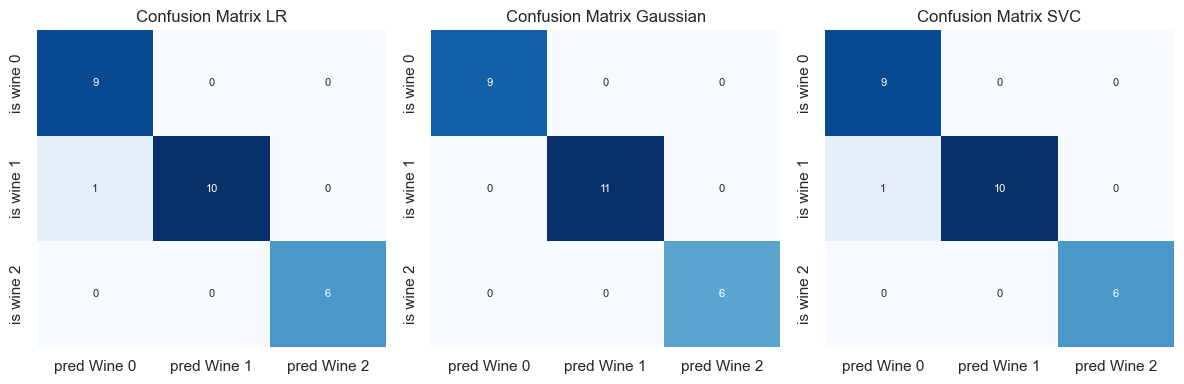

In [94]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Create confusion matrix DataFrames for LR, Gaussian, and SVC
confusion_df_LR = pd.DataFrame(conf_matrix_LR, columns=['pred Wine 0', 'pred Wine 1', 'pred Wine 2'], index=['is wine 0', 'is wine 1', 'is wine 2'])
confusion_df_Gauss = pd.DataFrame(conf_matrix_Gauss, columns=['pred Wine 0', 'pred Wine 1', 'pred Wine 2'], index=['is wine 0', 'is wine 1', 'is wine 2'])
confusion_df_SVC = pd.DataFrame(conf_matrix_SVC, columns=['pred Wine 0', 'pred Wine 1', 'pred Wine 2'], index=['is wine 0', 'is wine 1', 'is wine 2'])

# Plot each confusion matrix in a separate subplot
sns.heatmap(confusion_df_LR, annot=True, cbar=None, cmap="Blues", ax=axes[0], fmt='d', annot_kws={"fontsize": 8})
axes[0].set_title("Confusion Matrix LR")

sns.heatmap(confusion_df_Gauss, annot=True, cbar=None, cmap="Blues", ax=axes[1], fmt='d', annot_kws={"fontsize": 8})
axes[1].set_title("Confusion Matrix Gaussian")

sns.heatmap(confusion_df_SVC, annot=True, cbar=None, cmap="Blues", ax=axes[2], fmt='d', annot_kws={"fontsize": 8})
axes[2].set_title("Confusion Matrix SVC")

# Adjust spacing between subplots
for ax in axes:
    ax.tick_params(axis='x', labelrotation=0)
    
plt.tight_layout()
plt.show()

In [95]:
# Confusion matrix is great to look at visually, but simpler number for indicating accuracy is also good

accuracy_LR = accuracy_score(y_test, y_preds_LR)
accuracy_Gaussian = accuracy_score(y_test, y_preds_Gauss)
accuracy_SVC = accuracy_score(y_test, y_preds_SVC)

print(f'Accuracy for LR is {accuracy_LR}')
print(f'Accuracy for Gaussian is {accuracy_Gaussian}')
print(f'Accuracy for SVC is {accuracy_SVC}')

Accuracy for LR is 0.9615384615384616
Accuracy for Gaussian is 1.0
Accuracy for SVC is 0.9615384615384616


In [117]:
# Doing cross validation and grid search as well to reconfirm scoring

lr_params = {
    'max_iter': [20000],
    'penalty': ['l2'],
    'C': [1, 10, 100, 1000, 10000]
}

grid_search_LR = GridSearchCV(LR, lr_params, cv=5, scoring='accuracy')
grid_search_LR.fit(X,y)

best_estimator_LR = grid_search_LR.best_estimator_
best_score_LR = grid_search_LR.best_score_
best_params_LR = grid_search_LR.best_params_

print(f"Best Estimator: {best_estimator_LR}")
print(f"Best Score: {best_score_LR}")
print(f"Best Parameters: {best_params_LR}")

Best Estimator: LogisticRegression(C=1, max_iter=20000)
Best Score: 0.9692307692307693
Best Parameters: {'C': 1, 'max_iter': 20000, 'penalty': 'l2'}


In [118]:
svc_params = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.0001],
    'kernel': ['linear','rbf']
}

grid_search_svm = GridSearchCV(SVC, svc_params, cv=5, scoring='accuracy')
grid_search_svm.fit(X,y)

best_estimator_svm = grid_search_svm.best_estimator_
best_score_svm = grid_search_svm.best_score_
best_params_svm = grid_search_svm.best_params_

print(f"Best Estimator: {best_estimator_svm}")
print(f"Best Score: {best_score_svm}")
print(f"Best Parameters: {best_params_svm}")

Best Estimator: SVC(C=1, gamma=0.001, kernel='linear', probability=True)
Best Score: 0.9692307692307693
Best Parameters: {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [119]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]  # Add other values as needed
}

grid_search_gauss = GridSearchCV(Gauss, param_grid, cv=5, scoring='accuracy')
grid_search_gauss.fit(X,y)

best_estimator_gauss = grid_search_gauss.best_estimator_
best_score_gauss = grid_search_gauss.best_score_
best_params_gauss = grid_search_gauss.best_params_

print(f"Best Estimator: {best_estimator_gauss}")
print(f"Best Score: {best_score_gauss}")
print(f"Best Parameters: {best_params_gauss}")

Best Estimator: GaussianNB()
Best Score: 0.976923076923077
Best Parameters: {'var_smoothing': 1e-09}


# 6.Interpretation and explanation

This concludes the scoring phase of the different models
Gaussian seems to be the best performing model both on cross validation and normal fitting
And now we move on to interpreting the result with LIME

In [131]:
import lime
from lime import lime_tabular
import warnings
warnings.filterwarnings("ignore")

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Wine0','Wine1', 'Wine2'],
    mode='classification')

In [142]:
exp_Gauss = explainer.explain_instance(
    data_row=X_test.iloc[13],
    predict_fn=Gauss.predict_proba,
    top_labels=3)

exp_Gauss.show_in_notebook(show_table=True)

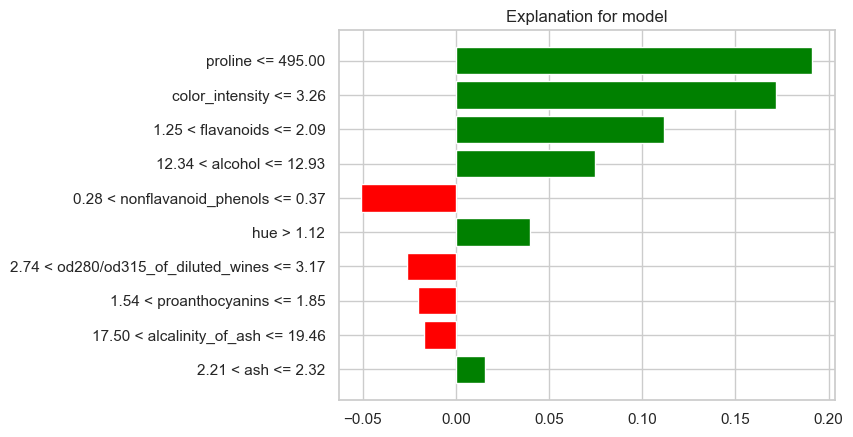

In [145]:
exp_Gauss.as_pyplot_figure()
plt.title("Explanation for model")
plt.show()

In [146]:
exp_Gauss.as_list()

[('proline <= 495.00', 0.19108360592182466),
 ('color_intensity <= 3.26', 0.17181447488837084),
 ('1.25 < flavanoids <= 2.09', 0.11178653387181554),
 ('12.34 < alcohol <= 12.93', 0.07480393883887093),
 ('0.28 < nonflavanoid_phenols <= 0.37', -0.0507610914284485),
 ('hue > 1.12', 0.04000073623474132),
 ('2.74 < od280/od315_of_diluted_wines <= 3.17', -0.026316023344634436),
 ('1.54 < proanthocyanins <= 1.85', -0.02049917467472392),
 ('17.50 < alcalinity_of_ash <= 19.46', -0.017191010283261504),
 ('2.21 < ash <= 2.32', 0.01595179843967753)]

In [149]:
y_test.iloc[13]

1.0

# Explanation summary

So from show_in_notebook graph, I have picked a random entry on X_test, which is index 13. It shows on LIME's show_on_notebook function that it's 100% confident that it belongs to wine class 1. Which, by the y_test.iloc[13] also confirms the answer as well.

There are quite a number of features which contributed why the model is sure that it's Wine1. The highest 3 of which are:
- Proline less or equal to 495. Wine0 and Wine2 tends to have more Proline. Less proline counts as evidence against it. For this particular entry 13, it's proline is 450 which is comparatively much less below the threshold than other entries
- Color intensity. The threshold for color intensity which the model calculated as a basis of which wine is which is 3.26. Entry 13 has 2.62 color intensity which is below this threshold. Wine0 and Wine2 tends to like wine whose color intensity are greater than the threshold
- Flavonoid score of 1.94. The criteria which the model had determine for flavonoid of wine1 is between 1.25 to 2.09

Overall, my conclusion is GaussianNB seems to be the best classifier out of the three being used